## Plot puv fluxes (baroclinic and barotropic energy)
adapted from diag_fluxes_lf.py

Plot snapshots of, e.g. low-pass filtered fields or avg.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.colors as colors
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['text.usetex'] = True
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, MFDataset
import numpy as np

In [4]:
it = "avg"  # time index
dosavefig = False

simul = 'luckyto'
#path_base = '/ccc/scratch/cont003/gen7638/lahayen/{}/data/'.format(simul.upper())
#path_fig = '/ccc/work/cont003/gen7638/lahayen/{}/pictures/'.format(simul.upper())
path_base = '/data0/project/vortex/lahaye/DIAG/NRJ_fluxes/'
path_fig = '/home/lahaye/Documents/Results/NRJ_fluxes/{}/'.format(simul.upper())
fil_iflux = path_base+simul+'_puv_fluxes.?.nc'
fil_sflux = path_base+simul+'_bt_fluxes.?.nc'
#fil_grd = '/ccc/store/cont003/gen7638/lahayen/lucky_corgrd.nc'
fil_grd = '/data0/project/vortex/lahaye/'+'lucky_corgrd.nc'
scale = 'linear'    # linear or log color-scale
picdir = "pictures/"

st = 2  #ncr.subsamp_step

# plotting parameters
fs       = 12
proj     = 'lcc'
res      = 'i'
stride   = 5
Lx,Ly    = 1450e3,1450e3 # extend in km
cmap = plt.get_cmap('seismic')  #get_colormap('WhiteBlueGreenYellowRed.ncmap')
zlevs=[0,2000,3500]
topocol='k'     # isobath. contour color
grdcol='gray'   # grid color

valmax = 0.5
valmin = -0.2
cmap = 'seismic'

In [6]:
# Load data
ncbt = MFDataset(fil_sflux,aggdim='eta_rho')

nc = Dataset(fil_grd,'r')
ncgvar = nc.variables
slix = slice(1,2000,st)
sliy = slice(1,2000,st)
lon = ncgvar['lon_rho'][sliy,:][:,slix]
lat = ncgvar['lat_rho'][sliy,:][:,slix]
topo = ncgvar['h'][sliy,:][:,slix]
indx, indy = ncbt.variables['xi_rho'][:],ncbt.variables['eta_rho'][:]
slix = slice(indx[0],indx[-1]+1,indx[1]-indx[0])
sliy = slice(indy[0],indy[-1]+1,indy[1]-indy[0])
pm = ncgvar['pm'][sliy,:][:,slix]/st
pn = ncgvar['pn'][sliy,:][:,slix]/st
nc.close()

# load data
#ncbc = MFDataset(fil_iflux,aggdim='eta_rho')
cterm = ncbt.variables['Ct_avg'][:]    
#Fx = np.ma.masked_invalid(ncbc.variables['puint_lf'][:,:,it])
#Fy = np.ma.masked_invalid(ncbc.variables['pvint_lf'][:,:,it])
#divflux = (np.gradient(Fx,np.mean(1./pm),axis=1) + np.gradient(Fy,np.mean(1./pn),axis=0)) *1e3
ncbt.close()

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


In [7]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

norm = MidpointNormalize(midpoint=0)



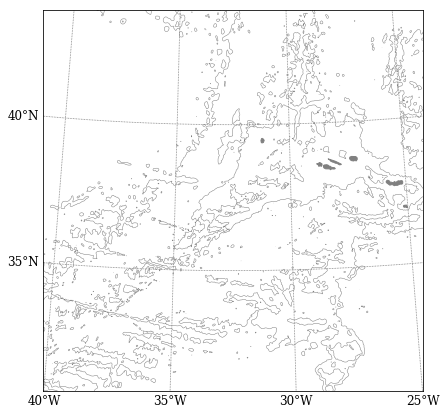

In [8]:
# plot data
toplot = cterm

fig = plt.figure(figsize=(8,7))
ax = plt.gca()
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
        lat_0=lat.mean(),width=Lx,height=Ly)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
for item in hct.collections:
    item.set_rasterized(True)

total conversion is 13.92 GW
domain averaged: 6.21 mW/m$^2$


/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


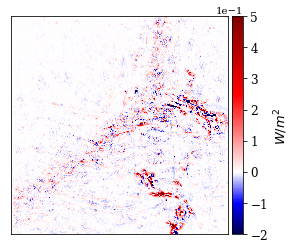

In [9]:
##### bottom-conversion term
hpc = bm.pcolormesh(xx,yy,toplot,vmin=valmin,vmax=valmax,norm=norm,cmap=cmap)
hcb = bm.colorbar(hpc)#,extend='both')
hcb.formatter.set_powerlimits((-1, 1))    
hcb.update_ticks()
hcb.ax.tick_params(labelsize=fs)

hcb.set_label(r'$W/m^2$',fontsize=fs+1)

if dosavefig:
    plt.savefig(picdir+"luckym2_Ct_slides.png",magnification='auto',dpi=150,bbox_inches="tight")
    
# total conversion (integrated over the domain)
Ctot = np.nansum(toplot/pm/pn)
print('total conversion is {:.2f} GW'.format(Ctot/1e9))
print(r'domain averaged: {:.2f} mW/m$^2$'.format(Ctot/np.sum(1./pm/pn)*1e3))

In [14]:
# Load data
ncbb = MFDataset(fil_sflux.replace('DIAG','DIAG/NRJ_fluxes'),aggdim='eta_rho')

# load data
cterm = ncbb.variables['Ct_lf'][:,:,it]    
#Fx = np.ma.masked_invalid(ncbc.variables['puint_lf'][:,:,it])
#Fy = np.ma.masked_invalid(ncbc.variables['pvint_lf'][:,:,it])
#divflux = (np.gradient(Fx,np.mean(1./pm),axis=1) + np.gradient(Fy,np.mean(1./pn),axis=0)) *1e3

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


total conversion is 12.66 GW
domain averaged: 5.65 mW/m$^2$


/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


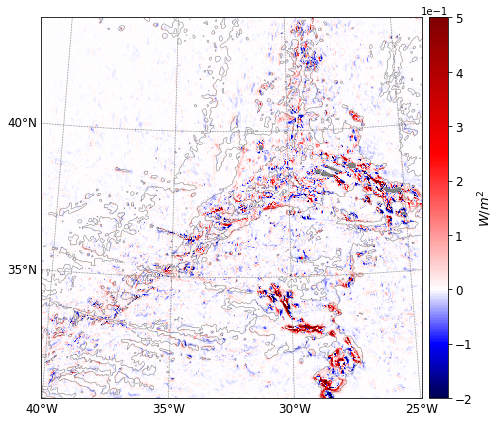

In [15]:
# plot data
toplot = cterm

fig = plt.figure(figsize=(8,7))
ax = plt.gca()
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
        lat_0=lat.mean(),width=Lx,height=Ly)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='gray')
bm.fillcontinents(color='gray')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)
hct = bm.contour(xx,yy,topo,levels=zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
for item in hct.collections:
    item.set_rasterized(True)

##### bottom-conversion term
hpc = bm.pcolormesh(xx,yy,toplot,vmin=valmin,vmax=valmax,norm=norm,cmap=cmap)
hcb = bm.colorbar(hpc)#,extend='both')
hcb.formatter.set_powerlimits((-1, 1))    
hcb.update_ticks()
hcb.ax.tick_params(labelsize=fs)

hcb.set_label(r'$W/m^2$',fontsize=fs+1)

if dosavefig:
    plt.savefig(picdir+"luckym2_Ct_slides.png",magnification='auto',dpi=150,bbox_inches="tight")
    
# total conversion (integrated over the domain)
Ctot = np.nansum(toplot/pm/pn)
print('total conversion is {:.2f} GW'.format(Ctot/1e9))
print(r'domain averaged: {:.2f} mW/m$^2$'.format(Ctot/np.sum(1./pm/pn)*1e3))